## Классификация рукописных цифр mnist

In [154]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ul>
Для классификации будем использовать следующие датасеты:
<li><b>mnist_test.csv</b> - тестовый набор из 10000 цифр;</li>
<li><b>mnist_test_10.csv</b> - тестовый набор из 10 цифр для разработки;</li>
<li><b>mnist_train.csv</b> - тренировочный набор из 60000 цифр;</li>
<li><b>mnist_train_100.csv</b> - тренировочный набор из 100 цифр для разработки.</li>
</ul>

### Изучаем данные:

In [2]:
with open('mnist_test_10.csv', 'r') as f:
    mnist_test = f.readlines()

In [6]:
len(mnist_test)

10

In [3]:
mnist_test[0]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

Первое значение 7 - это маркер, поэтому при дальнейшей работе с числами его необходимо игнорировать.

In [98]:
len(mnist_test[0].split(',')[1:])

784

In [101]:
max([int(x) for x in mnist_test[0].split(',')[1:]])

255

In [102]:
min([int(x) for x in mnist_test[0].split(',')[1:]])

0

In [20]:
with open('mnist_train_100.csv', 'r') as f:
    mnist_train = f.readlines()

In [22]:
len(mnist_train)

100

In [23]:
mnist_train[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [103]:
len(mnist_train[3].split(',')[1:])

784

In [104]:
max([int(x) for x in mnist_train[3].split(',')[1:]])

255

In [105]:
min([int(x) for x in mnist_train[3].split(',')[1:]])

0

Каждая цифра из датасета mnist состоит из 784 символа, т.к. все изображения имеют стандартный размер 28x28. И имеют значения кодов цветов в диапазоне от 0 до 255.

In [106]:
def csv_to_image(line):
    img_data = np.asfarray(line.split(',')[1:]).reshape(28, 28)
    plt.imshow(img_data, cmap='Greys', interpolation='None');

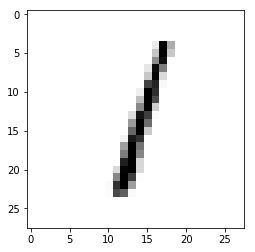

In [107]:
csv_to_image(mnist_test[2])

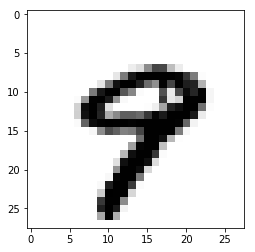

In [108]:
csv_to_image(mnist_test[9])

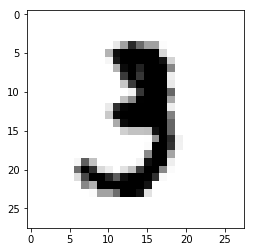

In [109]:
csv_to_image(mnist_train[10])

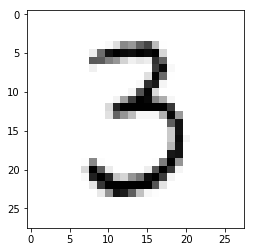

In [110]:
csv_to_image(mnist_train[50])

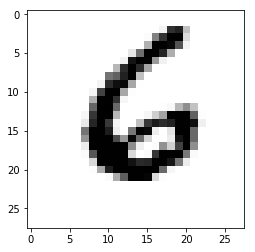

In [111]:
csv_to_image(mnist_train[90])

### Подготовка данных:

Первое что необходимо сделать - преобразовать значения от 0 до 255 в значения от 0.01 до 1.0 как более оптимальные для активации узлов нейронной сети.

In [165]:
def csv_to_input_list(line):
    img_data = np.asfarray(line.split(',')[1:])
    return (img_data / 255.0 * 0.99) + 0.01

In [166]:
csv_to_input_list(mnist_test[0])

array([ 0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01

Теперь надо подготовить примеры на которых сети необходимо проводить обучение. Так как всего цифр 10, то и выходных слоев сети должно быть тоже 10. Узел с наибольшим выходным весом будет определять соответсвующую цифру, например, выходные веса [0.01, 0.00, 0.25, 0.00, 0.01, 0.00, 0.01, 0.79, 0.00] - соответствуют цифре 8. Нули в данном случае - ошибки округления, так как функция активации у нас сигмойда, и она будет бесконечно стремиться к 0 или 1, но никогда не достигнет их. Соответственно, учитывая данную логику, можно составить примеры "идеальных" весов для каждой из 10 цифр для тренировки сети. Например, [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01] будут соответствовать "идеальной" цифре 8.

In [177]:
def csv_to_target_list(line):
    base = np.array([0.01] * 10)
    marker = int(line.split(',')[0])  # чтобы понять какой у нас число, берем первый символ - маркер числа
    base[marker] = 0.99
    return base

In [178]:
mnist_test[0].split(',')[0]

'7'

In [179]:
csv_to_target_list(mnist_test[0])

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.99,  0.01,  0.01])

In [180]:
len(csv_to_target_list(mnist_test[0]))

10

Вроде все ок, можно приступать к тренировки сети.

### Тренировка сети:

#### 1. Определимся с параметрами сети:

In [159]:
# количество входных слоев будет равно количеству символов в каждой строке датасета, чтобы избежать излишнего обобщения информации
INPUT_NODES = 784

# количество выходных слоев будет равно общему количеству всех возможных маркеров ответа
OUTPUT_NODES = 10

# количество скрытых слоев будет равно 10 * 10 - общее количество выходных слоев * количество всех возможных маркеров ответа
HIDDEN_NODES = 100

#### 2. Заимпортируем и создадим объект нейронной сети:

In [157]:
import os
import sys

try:
    from neural_network import NeuralNetwork
except ImportError:
    path = os.path.abspath(os.path.join('..'))
    if path not in sys.path:
        sys.path.insert(1, path)
    from neural_network import NeuralNetwork

In [160]:
nn = NeuralNetwork(input_nodes=INPUT_NODES, hidden_nodes=HIDDEN_NODES, output_nodes=OUTPUT_NODES)

#### 3. Создадим функцию для чтения тренировочных данных:

Для того, чтобы более эффективно использовать ресурсы компьютера лучше читать файлы с помощью генератора.

In [181]:
def xreadlines(file_path):
    with open(file_path, mode='r', encoding='utf-8') as file:
        for line in file:
            if line:
                yield line

In [182]:
def train_nn(file_path, n):
    for line in xreadlines(file_path):
        input_list = csv_to_input_list(line)
        target_list = csv_to_target_list(line)
        n.train(input_list, target_list)

#### 4. Проведем эксперимент:

In [183]:
train_nn('mnist_train_100.csv', nn)

ValueError: shapes (10,100) and (10,1) not aligned: 100 (dim 1) != 10 (dim 0)